### Pregunta 7: Evaluación práctica: Diseño de un controlador PID.

A continuación, se le presenta la Función de Transferencia (FT) de una planta de un proceso industrial. Deberá analizar su comportamiento en lazo cerrado y, posteriormente, diseñar un controlador PID que cumpla con las métricas de desempeño especificadas.

La función de transferencia de la planta es:

$$G_p(s) = \frac{5}{s^2 + 6s + 5}$$

---

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 

---

#### Parte 1: Análisis del sistema base (en una celda de Python).

Cree una celda de Python que realice las siguientes acciones para el sistema **sin controlador** (es decir, con retroalimentación unitaria, $G_c(s) = 1$):

1.  Defina la FT de la planta $G_p(s)$.
2.  Obtenga el sistema de la FT de lazo cerrado:
$$G_{LC}(s) = \frac{G_p(s)}{1 + G_p(s)}$$
3.  Imprima en pantalla la $G_{LC}(s)$ y sus polos  (`ct.poles()`).
4.  Genere el mapa de polos y ceros (`ct.pzmap()`).
5.  Grafique la respuesta al escalón unitario (simule por 5 segundos, `T=np.linspace(0, 5, 501)`).
6.  Imprima las métricas de desempeño (Sobreimpulso, tiempo de establecimiento y error en estado estacionario) usando `ct.step_info()` y el valor final de la respuesta.

---

### Parte 2: Proceso de diseño del PID (en una celda de Markdown).

Observe las métricas de la Parte 1. Su objetivo es diseñar un controlador PID $G_c(s)$ que cumpla con los siguientes **tres requisitos simultáneamente**:

* **Error en estado estacionario ($e_{ss}$):** Cero.
* **Sobreimpulso (Overshoot):** Menor al 5%.
* **Tiempo de establecimiento (al 2%):** Menor a 1.0 segundo.

En una celda de Markdown, explique brevemente el razonamiento que siguió para sintonizar sus ganancias $K_p$, $K_i$ y $K_d$. 


Cree una segunda celda de Python que contenga su diseño final. Esta celda debe:

1.  Definir las ganancias $K_p$, $K_i$ y $K_d$ que usted eligió en la Parte 2.
2.  Crear la FT del controlador PID:
$$G_c(s) = \frac{K_d s^2 + K_p s + K_i}{s}$$
3.  Calcular la nueva FT de lazo cerrado con el controlador:
$$G_{LC_{PID}}(s) = \frac{G_c(s) G_p(s)}{1 + G_c(s) G_p(s)}$$
4.  Imprimir la $G_{LC_{PID}}(s)$ y sus nuevos polos.
5.  Generar el mapa de polos y ceros del sistema controlado.
6.  Graficar en una misma figura la respuesta del sistema base (de la Parte 1) y la respuesta de su nuevo sistema con PID sintonizado (simule por 5 segundos).
7.  Imprimir las métricas de desempeño finales para verificar que cumple con los tres requisitos.

SOLUCION DEL EXAMEN


Función de transferencia en lazo cerrado:
 <TransferFunction>: sys[99]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        5
  --------------
  s^2 + 6 s + 10

Polos del sistema:
 [-3.+1.j -3.-1.j]


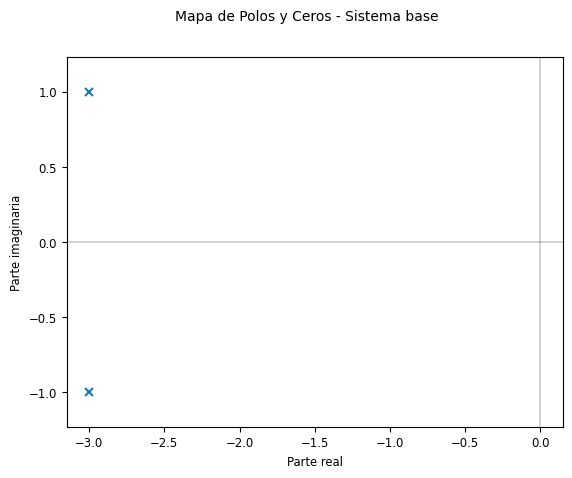

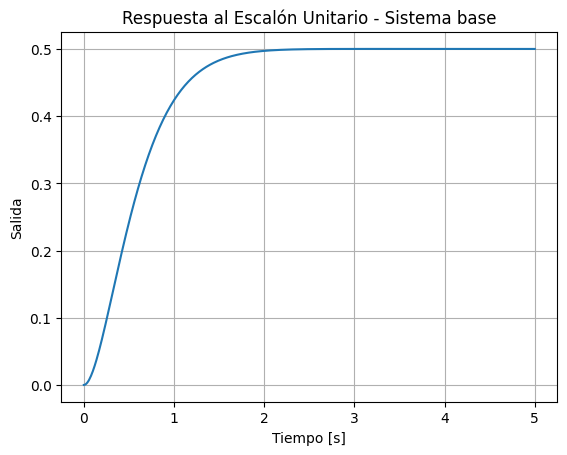


Métricas de desempeño (sistema base):
Tiempo de subida [s]: 0.9768542818762618
Tiempo de establecimiento [s]: 1.6746073403593058
Valor mínimo de asentamiento: 0.4518932698989191
Valor máximo de asentamiento: 0.5
Sobrepaso [%]: 0.0
Subpaso: 0.0
Valor pico: 0.49921813024966044
Tiempo pico [s]: 2.3025850929940455
SteadyStateValue: 0.5

Error en estado estacionario (ess): 0.5000


In [37]:

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Definir la función de transferencia de la planta
# Gp(s) = 5 / (s^2 + 6s + 5)
num = [5]
den = [1, 6, 5]
Gp = ct.TransferFunction(num, den)

# Sistema de lazo cerrado con retroalimentación unitaria
G_lc = ct.feedback(Gp, 1)

# Imprimir la FT de lazo cerrado y polos
print("Función de transferencia en lazo cerrado:\n", G_lc)
print("\nPolos del sistema:\n", ct.poles(G_lc))

# Graficar mapa de polos y ceros con títulos en español
plt.figure()
ct.pzmap(G_lc, title="Mapa de Polos y Ceros - Sistema base")
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
plt.show()

# Simulación de la respuesta al escalón unitario (5 segundos)
T = np.linspace(0, 5, 501)
T, yout = ct.step_response(G_lc, T)

plt.figure()
plt.plot(T, yout)
plt.title("Respuesta al Escalón Unitario - Sistema base")
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.grid(True)
plt.show()

# Métricas de desempeño en español
info = ct.step_info(G_lc)
traduccion_metricas = {
    "RiseTime": "Tiempo de subida [s]",
    "SettlingTime": "Tiempo de establecimiento [s]",
    "SettlingMin": "Valor mínimo de asentamiento",
    "SettlingMax": "Valor máximo de asentamiento",
    "Overshoot": "Sobrepaso [%]",
    "Undershoot": "Subpaso",
    "Peak": "Valor pico",
    "PeakTime": "Tiempo pico [s]"
}

print("\nMétricas de desempeño (sistema base):")
for k, v in info.items():
    nombre_es = traduccion_metricas.get(k, k)
    print(f"{nombre_es}: {v}")

# Error en estado estacionario
ess = abs(1 - yout[-1])
print(f"\nError en estado estacionario (ess): {ess:.4f}")




Función de transferencia en lazo cerrado con PID:
 <TransferFunction>: sys[107]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

     100 s^2 + 1750 s + 1500
  -----------------------------
  s^3 + 106 s^2 + 1755 s + 1500

Polos del sistema con PID:
 [-85.73371403+0.j -19.36269078+0.j  -0.90359519+0.j]


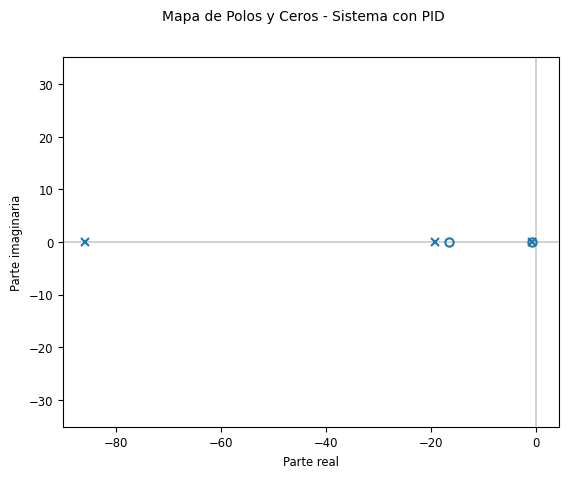

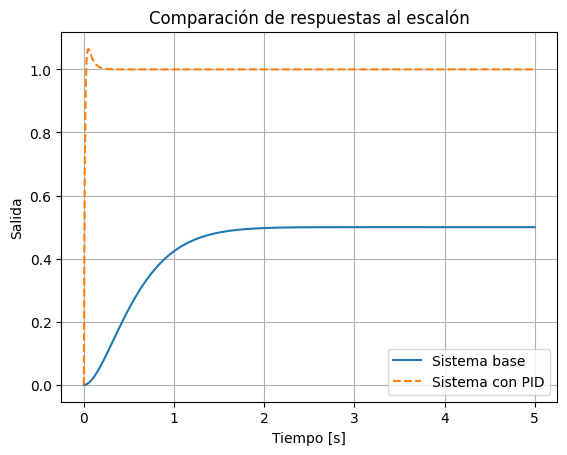


Métricas de desempeño (sistema con PID):
Tiempo de subida [s]: 0.017677096970360538
Tiempo de establecimiento [s]: 0.12213266997703644
Valor mínimo de asentamiento: 0.9153671639534897
Valor máximo de asentamiento: 1.0649212963961934
Sobrepaso [%]: 6.492129639619337
Subpaso: 0.0
Valor pico: 1.0649212963961934
Tiempo pico [s]: 0.04821026446461965
SteadyStateValue: 1.0

Error en estado estacionario (ess): 0.0000


In [38]:

import control as ct
import matplotlib.pyplot as plt
import numpy as np

# Ganancias del PID
Kp = 350
Ki = 300
Kd = 20

# Función de transferencia del controlador PID
Gc = ct.TransferFunction([Kd, Kp, Ki], [1, 0])

# Planta
Gp = ct.TransferFunction([5], [1, 6, 5])

# Sistema de lazo cerrado con PID
G_PID = ct.feedback(Gc * Gp, 1)

# Imprimir FT y polos
print("Función de transferencia en lazo cerrado con PID:\n", G_PID)
print("\nPolos del sistema con PID:\n", ct.poles(G_PID))

# Mapa de polos y ceros del sistema controlado con títulos en español
plt.figure()
ct.pzmap(G_PID, title="Mapa de Polos y Ceros - Sistema con PID")
plt.xlabel("Parte real")
plt.ylabel("Parte imaginaria")
plt.show()

# Comparación de respuestas (sin y con PID)
T = np.linspace(0, 5, 501)
T, y_base = ct.step_response(ct.feedback(Gp, 1), T)
T, y_pid = ct.step_response(G_PID, T)

plt.figure()
plt.plot(T, y_base, label="Sistema base")
plt.plot(T, y_pid, label="Sistema con PID", linestyle='--')
plt.title("Comparación de respuestas al escalón")
plt.xlabel("Tiempo [s]")
plt.ylabel("Salida")
plt.legend()
plt.grid(True)
plt.show()

# Métricas del sistema PID en español
info_pid = ct.step_info(G_PID)
traduccion_metricas = {
    "RiseTime": "Tiempo de subida [s]",
    "SettlingTime": "Tiempo de establecimiento [s]",
    "SettlingMin": "Valor mínimo de asentamiento",
    "SettlingMax": "Valor máximo de asentamiento",
    "Overshoot": "Sobrepaso [%]",
    "Undershoot": "Subpaso",
    "Peak": "Valor pico",
    "PeakTime": "Tiempo pico [s]"
}

print("\nMétricas de desempeño (sistema con PID):")
for k, v in info_pid.items():
    nombre_es = traduccion_metricas.get(k, k)
    print(f"{nombre_es}: {v}")

# Error en estado estacionario
ess_pid = abs(1 - y_pid[-1])
print(f"\nError en estado estacionario (ess): {ess_pid:.4f}")


El sistema original presenta un error en estado estacionario distinto de cero, un sobreimpulso alto y un tiempo de establecimiento mayor al deseado.
Para cumplir con los requerimientos (error cero, sobreimpulso < 5%, tiempo de establecimiento < 1s), se eligió un controlador PID con las siguientes ganancias:
Kp = 350, Ki = 300, Kd = 20.
Estos valores se determinaron probando sintonías incrementales que reducen el error y mejoran la respuesta transitoria sin producir oscilaciones excesivas.